In [1]:
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

Using TensorFlow backend.


In [2]:
# 此函數會幫我們把多張影像畫成一張多宮格圖
def img_combine(img, ncols=8, size=1, path=False):
    from math import ceil
    import matplotlib.pyplot as plt
    import numpy as np
    nimg = len(img)
    nrows = int(ceil(nimg/ncols))
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True, figsize=(ncols*size,nrows*size))
    if nrows == 0:
        return
    elif ncols == 1:
        for r, ax in zip(np.arange(nrows), axes):
            nth=r
            if nth < nimg:
                ax.imshow(img[nth], cmap='rainbow', vmin=0, vmax=1)
                
            ax.set_axis_off()
    elif nrows == 1:
        for c, ax in zip(np.arange(ncols), axes):
            nth=c
            if nth < nimg:
                ax.imshow(img[nth], cmap='rainbow', vmin=0, vmax=1)
            ax.set_axis_off()
    else:
        for r, row in zip(np.arange(nrows), axes):
            for c, ax in zip(np.arange(ncols), row):
                nth=r*ncols+c
                if nth < nimg:
                    ax.imshow(img[nth], cmap='rainbow', vmin=0, vmax=1)
                ax.set_axis_off()
    plt.show()

In [3]:
# 讀取 Cifar-10 資料集
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

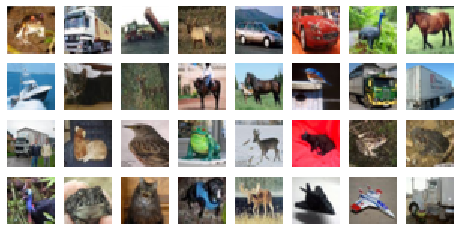

In [4]:
# 取前 32 張圖片做視覺化
images = x_train[:32]
img_combine(images)

In [5]:
# 建立 ImageDataGenerator，並指定我們要做資料增強的數值範圍
data_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

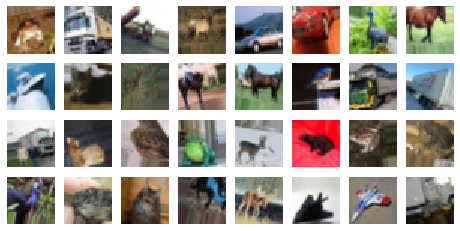

In [6]:
# 注意！！ ImageDataGenerator 是一個 Generator (生成器)! 對 Generator 不熟悉的同學請回到 Day098 做複習。
# 使用 .flow 後，就會對我們的影像進行增強，再 call next 取出 generator 的圖像。(shuffle=False 因為我們希望圖像的順序不要改變，方便觀察。實際訓練時預設是 shuffle=True) 
augmented_iamges = next(data_generator.flow(images, shuffle=False))
img_combine(augmented_iamges.astype("int")) # 注意在訓練時神經網路時，圖像資料必須要是 float32，但在做視覺化時要轉為 int 才能順利畫圖。所以為了畫圖才把資料轉為 int

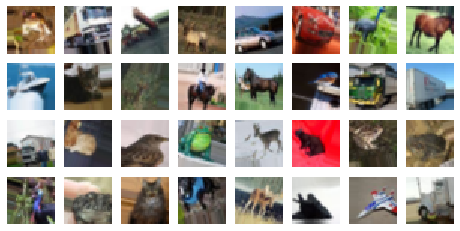

In [7]:
# 因為隨機性的關係，所以一樣的圖像再經過一次 generator 後的結果不一定相同
augmented_iamges = next(data_generator.flow(images, shuffle=False))
img_combine(augmented_iamges.astype("int"))

## 作業

請使用 ImageDataGenerator 來進行 Cifar-10 資料集的訓練，並觀察不同的圖像增強方法是否會顯著影響訓練結果

In [8]:
import keras, math
from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, Flatten, Dense
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
batch_size = 32
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
def mkmodel():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    return model

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [9]:
model1=mkmodel()
model2=mkmodel()
model3=mkmodel()
datagen1 = ImageDataGenerator(horizontal_flip=True)
datagen2 = ImageDataGenerator(vertical_flip=True)
datagen3 = ImageDataGenerator(featurewise_center=True, zca_whitening=True)
datagen1.fit(x_train)
datagen2.fit(x_train)
datagen3.fit(x_train)
model1.fit_generator(datagen1.flow(x_train, y_train, batch_size=batch_size),steps_per_epoch=math.ceil(x_train.shape[0]/batch_size),
                              epochs=10, validation_data=(x_test, y_test))
score1 = model1.evaluate(x_test, y_test, verbose=0)
model2.fit_generator(datagen2.flow(x_train, y_train, batch_size=batch_size),steps_per_epoch=math.ceil(x_train.shape[0]/batch_size),
                              epochs=10, validation_data=(x_test, y_test))
score2 = model2.evaluate(x_test, y_test, verbose=0)
model3.fit_generator(datagen3.flow(x_train, y_train, batch_size=batch_size),steps_per_epoch=math.ceil(x_train.shape[0]/batch_size),
                              epochs=10, validation_data=(x_test, y_test))
score3 = model3.evaluate(x_test, y_test, verbose=0)
print('horizontal_flip Test loss:', score1[0])
print('horizontal_flip Test accuracy:', score1[1])
print('vertical_flip Test loss:', score2[0])
print('vertical_flip Test accuracy:', score2[1])
print('zca_whitening Test loss:', score3[0])
print('zca_whitening Test accuracy:', score3[1])






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10





1563/1563 [==============================] - 325s 208ms/step - loss: 1.5467 - acc: 0.4319 - val_loss: 1.2047 - val_acc: 0.5676
Epoch 2/10
1563/1563 [==============================] - 340s 218ms/step - loss: 1.1596 - acc: 0.5886 - val_loss: 0.9963 - val_acc: 0.6460
Epoch 3/10
1563/1563 [==============================] - 341s 218ms/step - loss: 1.0051 - acc: 0.6474 - val_loss: 0.8457 - val_acc: 0.7027
Epoch 4/10
1563/1563 [==============================] - 346s 221ms/step - loss: 0.9264 - acc: 0.6746 - val_loss: 0.8204 - val_acc: 0.7166
Epoch 5/10
1563/1563 [==============================] - 334s 214ms/step - loss: 0.8594 - acc: 0.7004 - val_loss: 0.8332 - val_acc: 0.7107
Epoch 6/10
1563/1563 [==============================] - 329s 210ms/step - loss: 0.8194